## Bài toán dự đoán giá nhà
- Đưa vào các thuộc tính căn nhà dự đoán giá (price)

### Bài tập
- Tiền xử lý dữ liệu cho trước: dữ liệu dự đoán giá nhà (xem thêm tại https://www.kaggle.com/harlfoxem/housesalesprediction)
- Xây dựng và đánh giá các mô hình KNN, Random Forest, Linear Regression, Ridge, Lasso
- Lựa chọn các siêu tham số cho từng mô hình
- So sánh các mô hình với nhau

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv('kc_house_data.csv')
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Tiền xử lý dữ liệu

In [5]:
print(type(dataset))
dataset.sort_values(by='date', ascending=True, inplace=True)
dataset.reset_index(inplace=True, drop=True)

dataset

<class 'pandas.core.frame.DataFrame'>


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5561000190,20140502T000000,437500.0,3,2.25,1970,35100,2.0,0,0,...,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
1,472000620,20140502T000000,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
2,1024069009,20140502T000000,675000.0,5,2.50,2820,67518,2.0,0,0,...,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
3,7853361370,20140502T000000,555000.0,4,2.50,3310,6500,2.0,0,0,...,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
4,5056500260,20140502T000000,440000.0,4,2.25,2160,8119,1.0,0,0,...,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1422700040,20150514T000000,183000.0,3,1.00,1170,7320,1.0,0,0,...,7,1170,0,1962,0,98188,47.4685,-122.282,2040,7320
21609,8730000270,20150514T000000,359000.0,2,2.75,1370,1140,2.0,0,0,...,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090
21610,7923600250,20150515T000000,450000.0,5,2.00,1870,7344,1.5,0,0,...,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650
21611,5101400871,20150524T000000,445500.0,2,1.75,1390,6670,1.0,0,0,...,6,720,670,1941,0,98115,47.6914,-122.308,920,6380


In [6]:
numeric_feature = dataset.columns.drop(['price', 'id', 'date'])

dataset_train = dataset[:15000]
dataset_test = dataset[15000:]



y = dataset['price']
X = dataset[numeric_feature]

y_train = y[:15000]
y_test = y[15000:]

X_train = X.iloc[:15000]
X_test = X.iloc[15000:]

print(f'Shape of training set: {X_train.shape}')
print(f'Shape of test set: {X_test.shape}')

print(type(X))
print(type(y))

Shape of training set: (15000, 18)
Shape of test set: (6613, 18)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [7]:
X


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,2.25,1970,35100,2.0,0,0,4,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
1,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
2,5,2.50,2820,67518,2.0,0,0,3,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
3,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
4,4,2.25,2160,8119,1.0,0,0,3,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,1.00,1170,7320,1.0,0,0,3,7,1170,0,1962,0,98188,47.4685,-122.282,2040,7320
21609,2,2.75,1370,1140,2.0,0,0,3,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090
21610,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650
21611,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380


In [8]:
y

0         437500.0
1         790000.0
2         675000.0
3         555000.0
4         440000.0
           ...    
21608     183000.0
21609     359000.0
21610     450000.0
21611     445500.0
21612    1310000.0
Name: price, Length: 21613, dtype: float64

In [9]:
#Scale X, and transfer X, y to np array
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
#X_test -> use std and mean of X_train to avoid data leak
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Xử lý dữ liệu thời gian

In [10]:
#split Date to smaller parts
dataset["date"] = pd.to_datetime(dataset["date"], format="%Y%m%dT%H%M%S")

year = dataset["date"].dt.year
month = dataset["date"].dt.month
day = dataset["date"].dt.day
print(f'Number of years in dataset: {year.unique()}')
print(f'Number of months in dataset: {month.unique()}')
print(f'Number of days in dataset: {day.unique()}')
# print(dataset["zipcode"].unique())

dataset["date"][15000:15600]

Number of years in dataset: [2014 2015]
Number of months in dataset: [ 5  6  7  8  9 10 11 12  1  2  3  4]
Number of days in dataset: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31  1]


15000   2015-01-13
15001   2015-01-13
15002   2015-01-13
15003   2015-01-13
15004   2015-01-14
           ...    
15595   2015-01-30
15596   2015-01-30
15597   2015-01-30
15598   2015-01-30
15599   2015-01-30
Name: date, Length: 600, dtype: datetime64[ns]

#### One-hot encoding cho tháng

In [11]:
month_onehot = pd.get_dummies(month)
month_onehot.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False


In [12]:
X_onehot_train = np.hstack((X_train, month_onehot[:15000]))
X_onehot_test = np.hstack((X_test, month_onehot[15000:]))

In [13]:
X_onehot_train

array([[-0.40214538,  0.15689264, -0.13835752, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40214538,  0.48051606,  0.53850018, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.71887456,  0.48051606,  0.77486319, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.40214538,  0.48051606,  0.05503039, ...,  0.        ,
         0.        ,  0.        ],
       [-1.46265535,  0.15689264, -0.86893409, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40214538, -1.4612245 , -0.91190918, ...,  0.        ,
         0.        ,  0.        ]], shape=(15000, 30))

#### Cyclical Encoding cho từng ngày

In [14]:
date_of_year = dataset["date"].dt.dayofyear

date_sin = np.sin(2 * np.pi * date_of_year / 365).values.reshape(-1, 1)
date_cos = np.cos(2 * np.pi * date_of_year / 365).values.reshape(-1, 1)

X_cyclical_train = np.hstack((X_train, date_sin[:15000], date_cos[:15000]))
X_cyclical_test = np.hstack((X_test, date_sin[15000:], date_cos[15000:]))

In [15]:
X_cyclical_train

array([[-0.40214538,  0.15689264, -0.13835752, ...,  0.8285941 ,
         0.86314213, -0.50496105],
       [-0.40214538,  0.48051606,  0.53850018, ..., -0.29951471,
         0.86314213, -0.50496105],
       [ 1.71887456,  0.48051606,  0.77486319, ...,  1.32113347,
         0.86314213, -0.50496105],
       ...,
       [-0.40214538,  0.48051606,  0.05503039, ..., -0.31505176,
         0.22192151,  0.97506453],
       [-1.46265535,  0.15689264, -0.86893409, ..., -0.42648735,
         0.22192151,  0.97506453],
       [-0.40214538, -1.4612245 , -0.91190918, ..., -0.11738182,
         0.22192151,  0.97506453]], shape=(15000, 20))

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from  sklearn.metrics import root_mean_squared_error, r2_score

In [17]:
print(X_onehot_train.shape)
print(X_onehot_test.shape)
print(type(y_test))

print('avg: ', np.mean(y_train))
print('max: ', np.max(y_train))
print('min: ', np.min(y_train))

(15000, 30)
(6613, 30)
<class 'numpy.ndarray'>
avg:  539385.5363333334
max:  7700000.0
min:  78000.0


In [18]:
regr = LinearRegression()
regr.fit(X_onehot_train, y_train)
y_regr_pred = regr.predict(X_onehot_test)

print(f"w0 = {regr.intercept_}")
print(f"w = [{regr.coef_}]")
print(f'RMSE: {root_mean_squared_error(y_test, y_regr_pred)}')
print(f'R2: {r2_score(y_test, y_regr_pred)}')

w0 = 540359.645018369
w = [[-3.44116229e+04  3.04361563e+04  8.73585873e+04  1.55318040e+03
  3.27716951e+03  5.32886542e+04  4.17112159e+04  1.78908710e+04
  1.11975136e+05  8.26871592e+04  2.71785944e+04 -7.63027312e+04
  9.46038642e+03 -3.12249373e+04  8.09147446e+04 -2.85023105e+04
  7.94660864e+03 -1.08100442e+04  1.30573805e+04  0.00000000e+00
  7.27595761e-12  1.81898940e-12 -4.17447662e+03  2.85060513e+03
 -1.61229843e+03  9.97039148e+02 -4.84017436e+03  2.69005029e+03
 -1.99450331e+03 -6.97362240e+03]]
RMSE: 205200.4284342763
R2: 0.6753579534887426


In [19]:
regr2 = LinearRegression()
regr2.fit(X_cyclical_train, y_train)
y_regr_pred2 = regr2.predict(X_cyclical_test)

print(f"w0 = {regr2.intercept_}")
print(f"w = [{regr2.coef_}]")
print(f'RMSE: {root_mean_squared_error(y_test, y_regr_pred2)}')
print(f'R2: {r2_score(y_test, y_regr_pred2)}')

w0 = 539538.9700046425
w = [[-34377.77637347  30463.24970803  87314.19304104   1543.19225501
   3287.47501878  53287.70540823  41746.86451109  17859.87944662
 111924.05884483  82657.72417498  27141.35641399 -76329.3365392
   9396.75491369 -31213.88244102  80908.00645001 -28495.83921186
   8055.4787267  -10774.88032823   1029.74314473   -701.59093763]]
RMSE: 204975.6387774707
R2: 0.6760688311744775


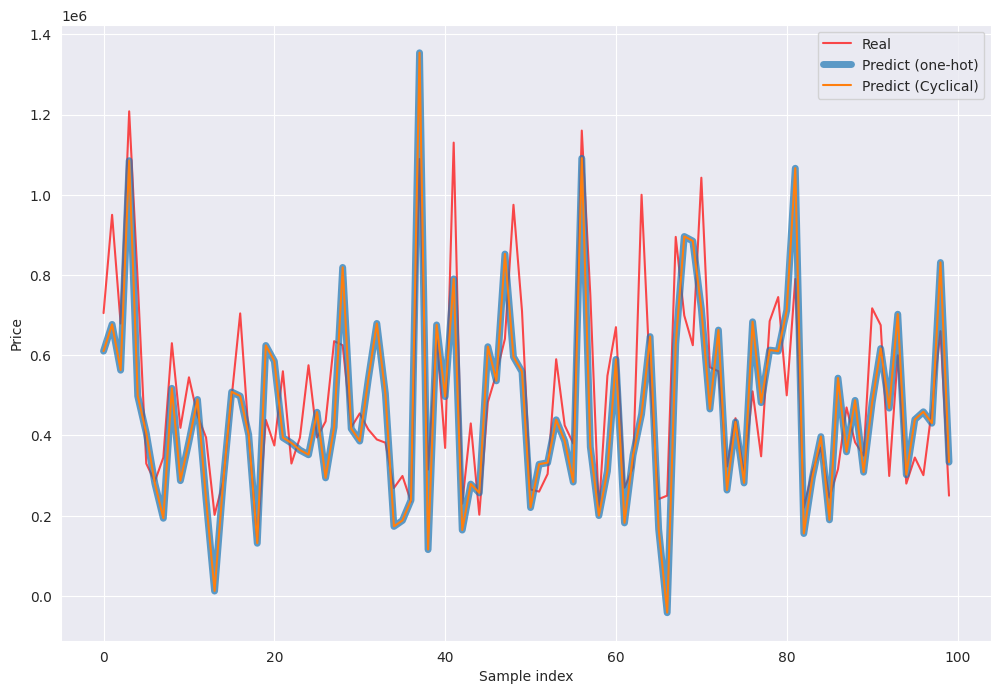

In [34]:
def plot_cmp(y_pred1, y_pred2=None, label1 = "Predict (one-hot)",label2 = "Predict (Cyclical)", begin = 4000, no_samples = 100):
    if y_pred2 is None:
        y_pred2 = []
    end = begin + no_samples

    plt.figure(figsize=(12,8))
    plt.plot(y_test[begin:end], label="Real", color="red", alpha=0.7)
    plt.plot(y_pred1[begin:end], label=label1, alpha=0.7, linewidth = 5)
    plt.plot(y_pred2[begin:end], label=label2, alpha=1)

    plt.xlabel('Sample index')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

plot_cmp(y_regr_pred, y_regr_pred2)

### Ridge

In [21]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_onehot_train, y_train)
y_ridge_pred = ridge.predict(X_onehot_test)

print(f'RMSE: {root_mean_squared_error(y_test, y_ridge_pred)}')
print(f'R2: {r2_score(y_test, y_ridge_pred)}')

RMSE: 205200.3628495225
R2: 0.6753581610084389


In [22]:
ridge2 = Ridge(alpha=0.1)
ridge2.fit(X_cyclical_train, y_train)
y_ridge_pred2 = ridge2.predict(X_cyclical_test)

print(f'RMSE: {root_mean_squared_error(y_test, y_ridge_pred2)}')
print(f'R2: {r2_score(y_test, y_ridge_pred2)}')

RMSE: 204975.58030190994
R2: 0.6760690159969682


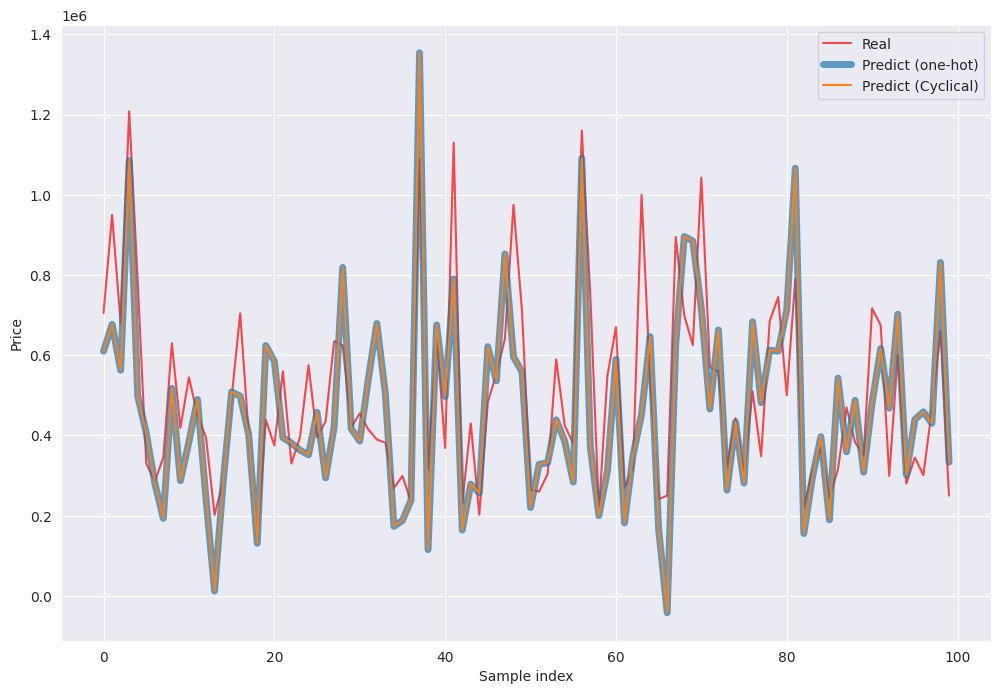

In [23]:
plot_cmp(y_ridge_pred, y_ridge_pred2)

### Lasso
##### Vì Ridge(L2) phần regularization trơn, khả vi -> Sklearn áp dụng luôn grad = 0 và giải (tối ưu lồi)
##### Lasso(L1) phần regularization không khả vi tại 0 ->Sklearn tìm nghiệm tối ưu thông qua lặp -> alpha ko hợp lý thì ko hội tụ

In [24]:
lasso = Lasso(alpha=1000)
lasso.fit(X_onehot_train, y_train)
y_lasso_pred = lasso.predict(X_onehot_test)

print(f'RMSE: {root_mean_squared_error(y_test, y_lasso_pred)}')
print(f'R2: {r2_score(y_test, y_lasso_pred)}')

print(lasso.dual_gap_)
print(lasso.tol)

RMSE: 205160.82868303845
R2: 0.6754832407888238
7452841.477125
0.0001


In [25]:
lasso2 = Lasso(alpha=1000)
lasso2.fit(X_cyclical_train, y_train)
y_lasso_pred2 = lasso2.predict(X_cyclical_test)

print(f'RMSE: {root_mean_squared_error(y_test, y_lasso_pred2)}')
print(f'R2: {r2_score(y_test, y_lasso_pred2)}')

RMSE: 205160.82868303845
R2: 0.6754832407888238


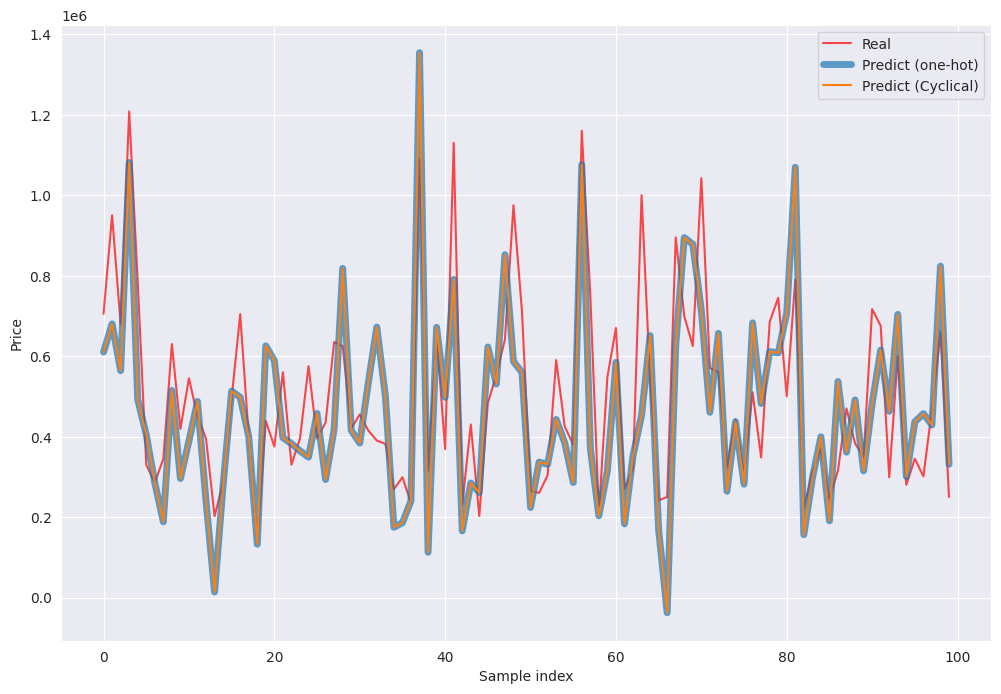

In [26]:
plot_cmp(y_lasso_pred, y_lasso_pred2)

### KNN

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
y_knn_pred = []
rmse = []
r2 = []

for k in range(1, 101):
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean', weights='distance')
    knn.fit(X_cyclical_train, y_train)
    y_knn_pred.append(knn.predict(X_cyclical_test))
    rmse.append(root_mean_squared_error(y_test, y_knn_pred[-1]))
    r2.append(r2_score(y_test, y_knn_pred[-1]))

k_opt = np.argmin(rmse)

print(f'Best KNN: n_neighbors = {k_opt + 1}, \n\trmse: {rmse[k_opt]} \n\tr2: {r2[k_opt]}')

Best KNN: n_neighbors = 9, 
	rmse: 174578.53863566718 
	r2: 0.7650205144751485


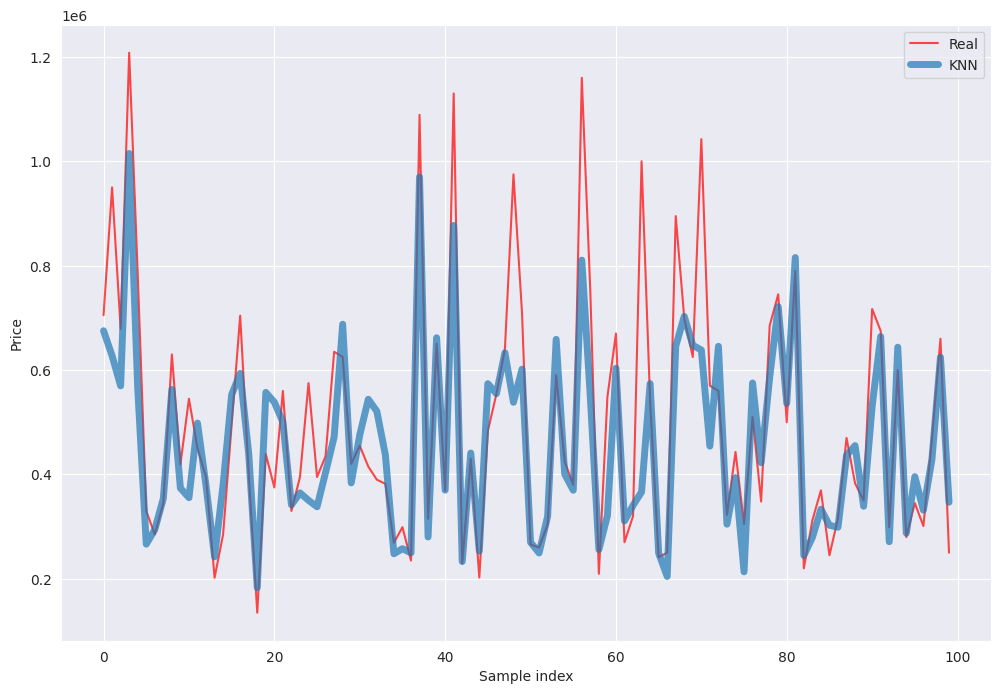

In [37]:
plot_cmp(y_knn_pred[k_opt], label1='KNN', label2=None)

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [31]:
param_dist1 = {
    'max_depth':[10, 15, 20, 25, 30, 40],
    'min_samples_leaf':[1, 2, 5, 10, 15],
    'min_samples_split':[2, 5, 10],
    'max_features': ['sqrt', 'log2', None]  #ex: each node choose sqrt(num_features) to split
}

model1 = DecisionTreeRegressor(random_state=42)
rand_search1 = RandomizedSearchCV(estimator=model1, param_distributions=param_dist1,
                                  n_iter=20, cv=5, n_jobs=-1, scoring='r2', random_state=42)
rand_search1.fit(X_cyclical_train, y_train)
dt = rand_search1.best_estimator_
print(dt)

y_dt_pred = dt.predict(X_cyclical_test)
print(f'RMSE: {root_mean_squared_error(y_test, y_dt_pred)}')
print(f'R2: {r2_score(y_test, y_dt_pred)}')


/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/pyth

DecisionTreeRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)
RMSE: 182941.06466152385
R2: 0.7419697367346978


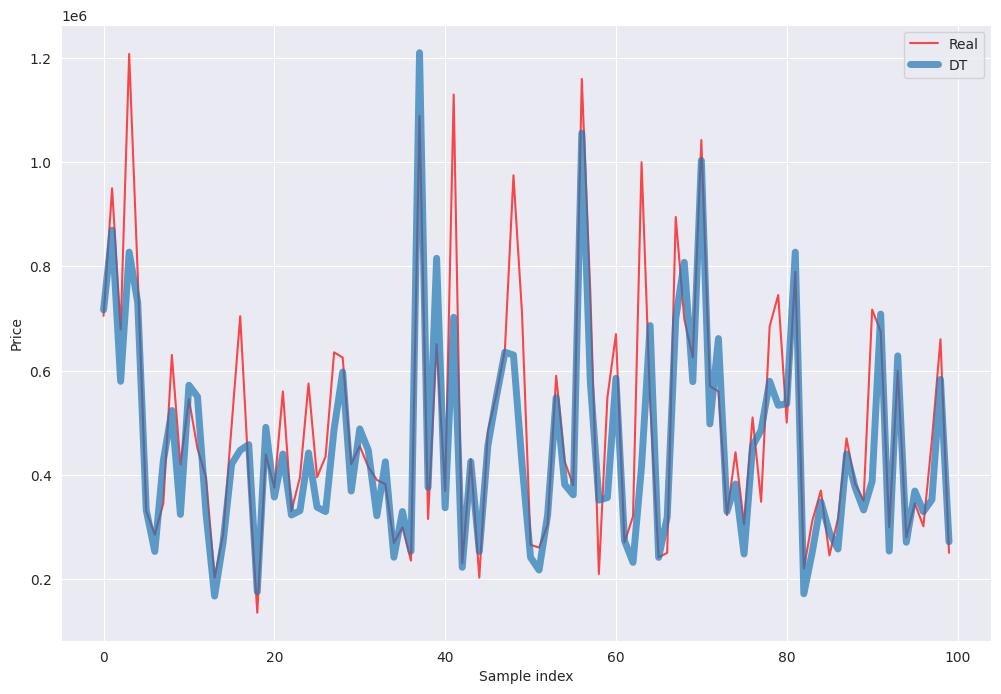

In [36]:
plot_cmp(y_dt_pred, label1="DT", label2=None)

In [32]:
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [20, 25, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5, 10],
    'max_features': ['sqrt', 'log2', None],
}

model = RandomForestRegressor(random_state=42)
rand_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, #n_iter: try random n_iters combinations of param_dist
                                 n_iter=20, cv=5, n_jobs=-1, scoring='r2', random_state=42)
rand_search.fit(X_cyclical_train, y_train)
rf = rand_search.best_estimator_
print(rf)

y_rf_pred = rf.predict(X_cyclical_test)

print(f'RMSE: {root_mean_squared_error(y_test, y_rf_pred)}')
print(f'R2: {r2_score(y_test, y_rf_pred)}')

RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=4,
                      n_estimators=200, random_state=42)
RMSE: 138187.29285559314
R2: 0.8527740182975377


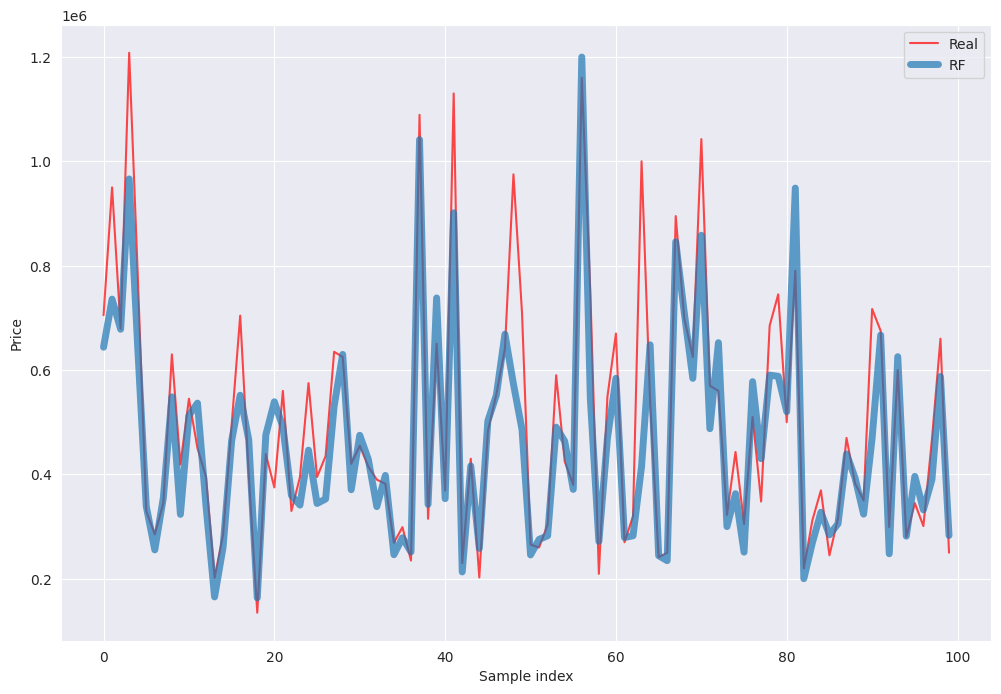

In [38]:
plot_cmp(y_rf_pred, label1='RF', label2=None)

### So sánh các mô hình với nhau

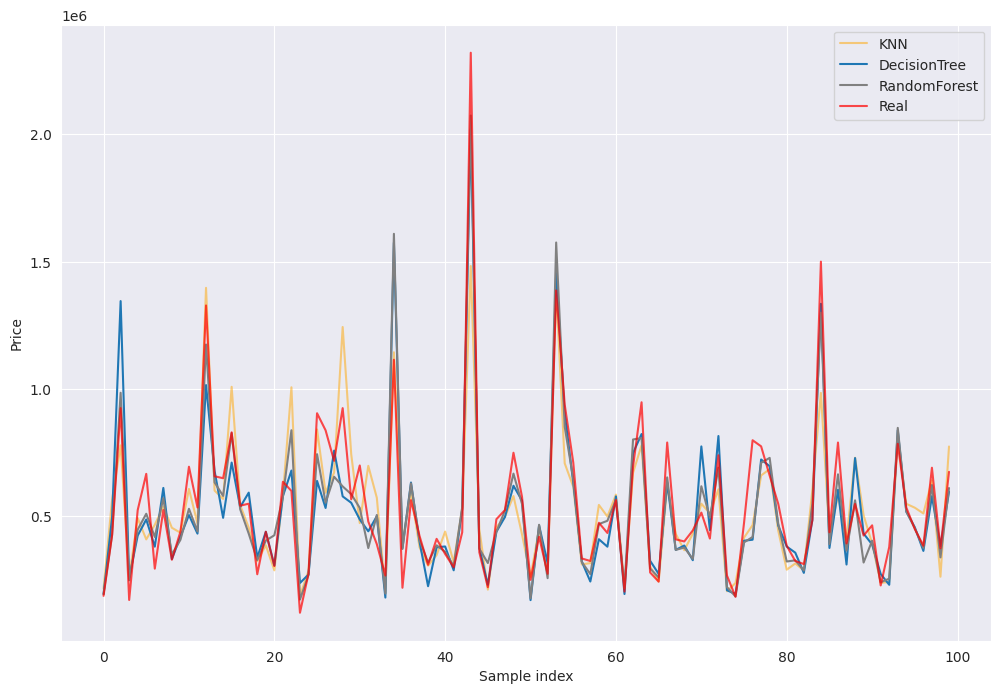

In [64]:
begin = 5000
end = 5100

plt.figure(figsize=(12,8))
# plt.plot(y_regr_pred[begin:end], label="Linear", alpha=0.7)
# plt.plot(y_ridge_pred[begin:end], label="Ridge", alpha=0.7)
# plt.plot(y_lasso_pred[begin:end], label="Lasso", alpha=1)
plt.plot(y_knn_pred[k_opt][begin:end], label="KNN", alpha=0.5, color = 'orange')
plt.plot(y_dt_pred[begin:end], label="DecisionTree", alpha=1)
plt.plot(y_rf_pred[begin:end], label="RandomForest", alpha=1, color = 'grey')
plt.plot(y_test[begin:end], label="Real", color="red", alpha=0.7)


plt.xlabel('Sample index')
plt.ylabel('Price')
plt.legend()
plt.show()

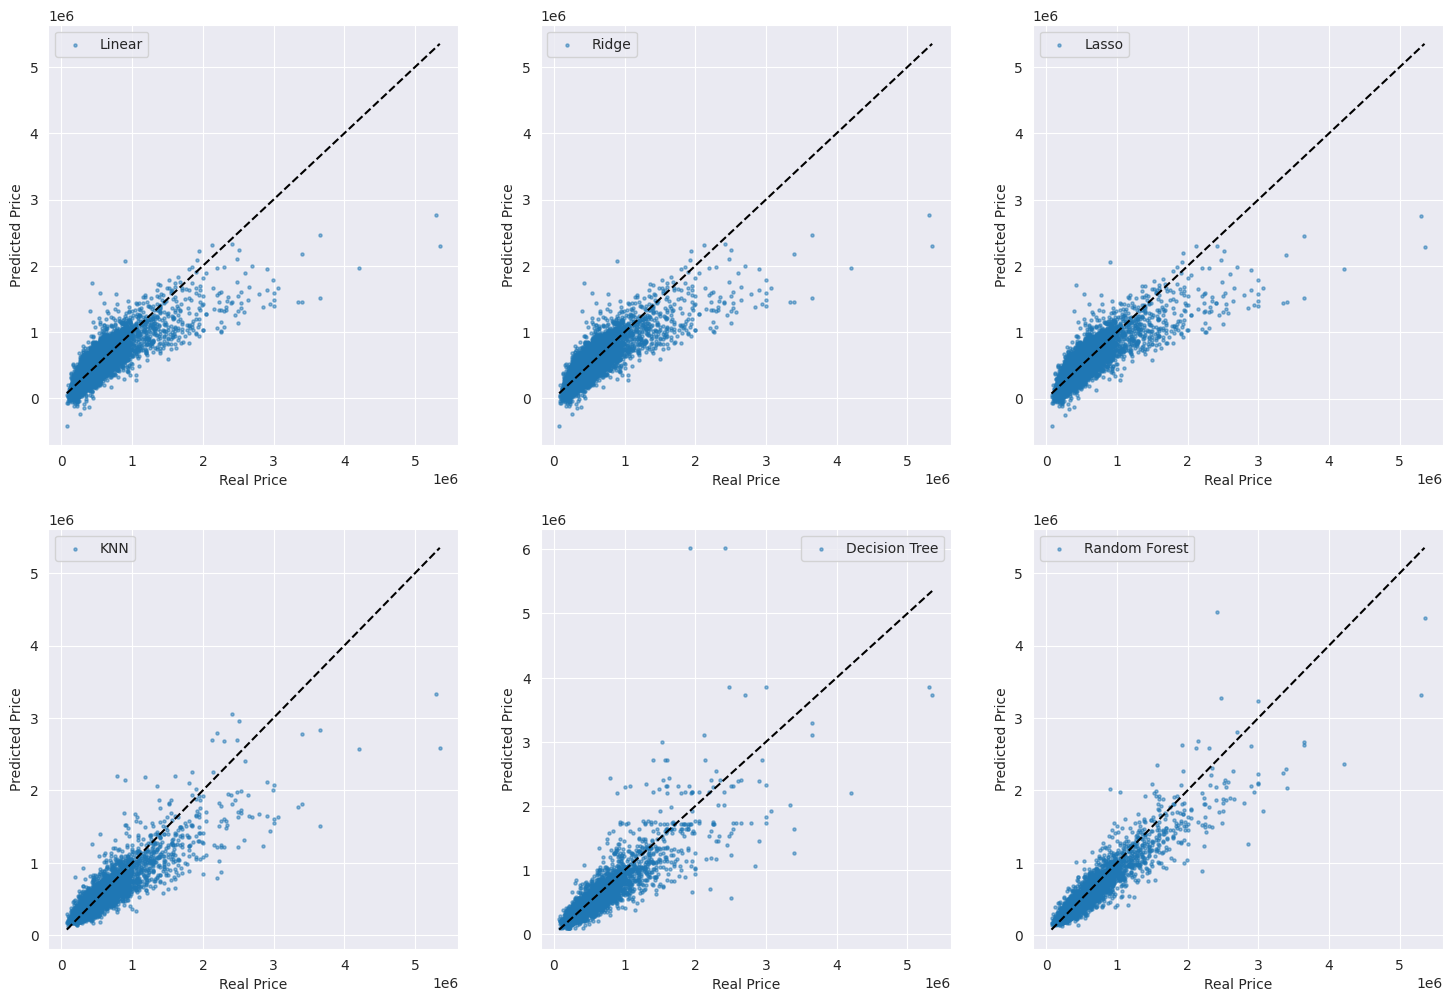

In [88]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

models = {
    "Linear" : y_regr_pred,
    "Ridge": y_ridge_pred,
    "Lasso": y_lasso_pred,
    "KNN": y_knn_pred[k_opt],
    "Decision Tree": y_dt_pred,
    "Random Forest": y_rf_pred
}

idx = 0
for axe in axes.ravel():
    (name, y_pred) = list(models.items())[idx]
    axe.scatter(y_test, y_pred, alpha=0.5, s=5, label=name)
    axe.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    axe.set_xlabel('Real Price')
    axe.set_ylabel('Predicted Price')
    axe.legend()
    idx += 1

plt.show()


#### Càng gần đường màu trắng (predict = real) thì càng chính xác